# Overview
In this notebook, we will conduct **indexing** and **retrieval** experiments using the **Vaswani** dataset.  
First initialize **Pyterrier**

In [1]:
import os
import torch
import pandas as pd
import pyterrier as pt

# Initialize PyTerrier
if not pt.started():
    pt.init()


/tmp/ipykernel_1841375/3537158046.py:7: DeprecationWarning: Call to deprecated function (or staticmethod) started. (use pt.java.started() instead) -- Deprecated since version 0.11.0.
  if not pt.started():
Java started and loaded: pyterrier.java, pyterrier.terrier.java [version=5.11 (build: craig.macdonald 2025-01-13 21:29), helper_version=0.0.8]
/tmp/ipykernel_1841375/3537158046.py:8: DeprecationWarning: Call to deprecated method pt.init(). Deprecated since version 0.11.0.
java is now started automatically with default settings. To force initialisation early, run:
pt.java.init() # optional, forces java initialisation
  pt.init()


In [ ]:
# import os
# os.environ['CUDA_HOME'] = '/usr/local/cuda-12.1'
# os.environ['PATH'] = '/usr/local/cuda-12.1/bin:' + os.environ['PATH']
# os.environ['LD_LIBRARY_PATH'] = '/usr/local/cuda-12.1/lib64:' + os.environ.get('LD_LIBRARY_PATH', '')
# os.environ['CXXFLAGS'] = '-std=c++17'

# Indexing

import **ColbertV2Indexer**

In [2]:
from pyterrier_colbert.indexing  import ColbertV2Indexer

Load **Vaswani** dataset

In [3]:
# Step 1: Load dataset
dataset = pt.get_dataset("vaswani")
topics = dataset.get_topics().head(50)
qrels = dataset.get_qrels()

colbert_model_path = Checkpoint we already have or have trained

In [4]:
colbert_model_path = '/data2/wangxiao/pyterrier_colbert/colbertv2.0'

ColbertV2Indexer(where you want to store the index, colbert_model_path, dataset name)

In [7]:
# indexer = ColbertV2Indexer('/mnt/c/Users/DJH/Desktop/code/colbert_v2_index',colbert_model_path, "vaswani")

Generate index

In [4]:
# indexer.index(dataset.get_corpus_iter())

Measure the **size** of the **index** we just generated

In [5]:
import os

def get_directory_size(directory):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(directory):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # Skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)
    return total_size

# index_path = "/mnt/c/Users/DJH/Desktop/code/colbert_v2_index/vaswani"
index_path = "/data2/wangxiao/pyterrier_colbert/colbert_v2_index/vaswani-docnos"
index_size = get_directory_size(index_path)

# Convert size to MB
index_size_mb = index_size / (1024 * 1024)
print(f"V2 Index size: {index_size_mb:.2f} MB")

V2 Index size: 24.56 MB


Do end to end retrieval
ColBERTv2Index(colbert_model_path, the folder where the index is stored (****note that it is a secondary folder****, in normal cases, **indexes/XXXX_nbits=X'**))

In [12]:
!ls /data2/wangxiao/pyterrier_colbert/colbert_v2_index/vaswani-docnos/indexes/vaswani-docnos/

0.codes.pt	 avg_residual.pt  doclens.0.json  metadata.json
0.metadata.json  buckets.pt	  docnos.npids	  plan.json
0.residuals.pt	 centroids.pt	  ivf.pid.pt


# Retrieval using ColBERTv2 and Plaid

In [5]:
colbert_model_path = '/data2/wangxiao/pyterrier_colbert/colbertv2.0'

In [6]:
from pyterrier_colbert.ranking import ColBERTv2Index
import time
start_time = time.time()
# bm25_terrier_stemmed = pt.BatchRetrieve.from_dataset('vaswani', 'terrier_stemmed', wmodel='BM25')
factory = ColBERTv2Index(colbert=colbert_model_path, 
                         index_location='/data2/wangxiao/pyterrier_colbert/colbert_v2_index/vaswani-docnos/indexes/vaswani-docnos/') 
colbert_e2e = factory.end_to_end()

end_time = time.time()

elapsed_time = end_time - start_time
print(f" V2 retrieval time: {elapsed_time:.2f} seconds")

/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/utils/amp.py:12: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()


[Jul 30, 21:55:53] #> Loading codec...
[Jul 30, 21:55:53] Loading decompress_residuals_cpp extension (set COLBERT_LOAD_TORCH_EXTENSION_VERBOSE=True for more info)...


/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/indexing/codecs/residual.py:141: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  centroids = torch.load(c

[Jul 30, 21:55:53] Loading packbits_cpp extension (set COLBERT_LOAD_TORCH_EXTENSION_VERBOSE=True for more info)...


/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/torch/utils/cpp_extension.py:1965: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


[Jul 30, 21:55:53] #> Loading IVF...
[Jul 30, 21:55:53] #> Loading doclens...


/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/search/index_loader.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ivf, ivf_lengths = torch.load(

[Jul 30, 21:55:53] #> Loading codes and residuals...



  0%|                                                                                                                                                                     | 0/1 [00:00<?, ?it/s]/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/indexing/codecs/residual_embeddings.py:86: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start settin

 V2 retrieval time: 1.45 seconds


call **.search()** to search whatever you want

In [16]:
from pyterrier_colbert.ranking import PlaidIndex
import time
start_time = time.time()
# bm25_terrier_stemmed = pt.BatchRetrieve.from_dataset('vaswani', 'terrier_stemmed', wmodel='BM25')
factory_plaid = PlaidIndex(colbert=colbert_model_path, 
                           index_location='/data2/wangxiao/pyterrier_colbert/colbert_v2_index/vaswani-docnos/indexes/vaswani-docnos/',
                           ncells=2, centroid_score_threshold=0.45, ndocs=1024) 
plaid_e2e = factory_plaid.end_to_end(k=100)
end_time = time.time()

elapsed_time = end_time - start_time
print(f" V2 retrieval time: {elapsed_time:.2f} seconds")

/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/utils/amp.py:12: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()


[Jul 30, 22:04:36] #> Loading codec...
[Jul 30, 22:04:36] #> Loading IVF...
[Jul 30, 22:04:36] #> Loading doclens...


/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/indexing/codecs/residual.py:141: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  centroids = torch.load(c

[Jul 30, 22:04:36] #> Loading codes and residuals...



  0%|                                                                                                                                                                     | 0/1 [00:00<?, ?it/s]/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/indexing/codecs/residual_embeddings.py:86: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start settin

 V2 retrieval time: 0.63 seconds


In [8]:
res = (plaid_e2e % 5).search("renewable energy")
res


#> QueryTokenizer.tensorize(batch_text[0], batch_background[0], bsize) ==
#> Input: renewable energy, 		 True, 		 None
#> Output IDs: torch.Size([32]), tensor([  101,     1, 13918,  2943,   102,   103,   103,   103,   103,   103,
          103,   103,   103,   103,   103,   103,   103,   103,   103,   103,
          103,   103,   103,   103,   103,   103,   103,   103,   103,   103,
          103,   103], device='cuda:0')
#> Output Mask: torch.Size([32]), tensor([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')



/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/utils/amp.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else NullContextManager()


,qid,docno,score,rank
0,1,2008,11.898438,0
1,1,1219,11.703125,1
2,1,272,11.570312,2
3,1,5600,11.382812,3
4,1,9273,11.250000,4


In [9]:
res = (colbert_e2e % 5).search("renewable energy")
res


#> QueryTokenizer.tensorize(batch_text[0], batch_background[0], bsize) ==
#> Input: renewable energy, 		 True, 		 None
#> Output IDs: torch.Size([32]), tensor([  101,     1, 13918,  2943,   102,   103,   103,   103,   103,   103,
          103,   103,   103,   103,   103,   103,   103,   103,   103,   103,
          103,   103,   103,   103,   103,   103,   103,   103,   103,   103,
          103,   103], device='cuda:0')
#> Output Mask: torch.Size([32]), tensor([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')



/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/utils/amp.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else NullContextManager()


,qid,query,docno,score,rank
0,1,renewable energy,2008,11.898438,1
1,1,renewable energy,1219,11.703125,2
2,1,renewable energy,272,11.570312,3
3,1,renewable energy,5600,11.382812,4


## Plaid retrieval with seperated stages: 
- Stage 1: candidate generation.
- Stage 2: centroid interaction.
- Stage 3: centroid pruning.
- Stage 4: final MaxSim Scoring.

In [10]:
stage1_df = factory_plaid.candidate_generation()(topics.head())
stage1_df

/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/utils/amp.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else NullContextManager()


,qid,query,Q_embs,pids,score,rank
0,1,measurement of dielectric constant of liquids ...,"[[[tensor(-0.0795, device='cuda:0'), tensor(-0...","[tensor(6, device='cuda:0', dtype=torch.int32)...","[[tensor(0.4277, device='cuda:0', dtype=torch....",0
0,2,mathematical analysis and design details of wa...,"[[[tensor(-0.1778, device='cuda:0'), tensor(-0...","[tensor(1, device='cuda:0', dtype=torch.int32)...","[[tensor(0.4531, device='cuda:0', dtype=torch....",0
0,3,use of digital computers in the design of band...,"[[[tensor(0.0170, device='cuda:0'), tensor(-0....","[tensor(1, device='cuda:0', dtype=torch.int32)...","[[tensor(0.3032, device='cuda:0', dtype=torch....",0
0,4,systems of data coding for information transfer,"[[[tensor(0.0969, device='cuda:0'), tensor(-0....","[tensor(0, device='cuda:0', dtype=torch.int32)...","[[tensor(0.0884, device='cuda:0', dtype=torch....",0
0,5,use of programs in engineering testing of comp...,"[[[tensor(0.0692, device='cuda:0'), tensor(-0....","[tensor(1, device='cuda:0', dtype=torch.int32)...","[[tensor(0.0589, device='cuda:0', dtype=torch....",0


In [11]:
stage2_df = factory_plaid.centroid_interaction()(stage1_df)  # DataFrame with qid, docno, approx_score
stage2_df

[Jul 30, 22:02:06] Loading segmented_lookup_cpp extension (set COLBERT_LOAD_TORCH_EXTENSION_VERBOSE=True for more info)...


,qid,query,pid,docno,score
0,1,measurement of dielectric constant of liquids ...,6,7,9.117188
1,1,measurement of dielectric constant of liquids ...,9,10,12.390625
2,1,measurement of dielectric constant of liquids ...,25,26,11.914062
3,1,measurement of dielectric constant of liquids ...,28,29,9.117188
4,1,measurement of dielectric constant of liquids ...,32,33,9.921875
...,...,...,...,...,...
6571,5,use of programs in engineering testing of comp...,11317,11318,10.351562
6572,5,use of programs in engineering testing of comp...,11318,11319,8.656250
6573,5,use of programs in engineering testing of comp...,11331,11332,10.687500
6574,5,use of programs in engineering testing of comp...,11383,11384,7.570312


In [12]:
stage3_df = factory_plaid.centroid_pruning()(stage2_df)
stage3_df

,qid,query,pid,docno
0,1,measurement of dielectric constant of liquids ...,5501,5502
1,1,measurement of dielectric constant of liquids ...,8149,8150
2,1,measurement of dielectric constant of liquids ...,7233,7234
3,1,measurement of dielectric constant of liquids ...,4568,4569
4,1,measurement of dielectric constant of liquids ...,1501,1502
...,...,...,...,...
4585,5,use of programs in engineering testing of comp...,6128,6129
4586,5,use of programs in engineering testing of comp...,4912,4913
4587,5,use of programs in engineering testing of comp...,4686,4687
4588,5,use of programs in engineering testing of comp...,4961,4962


In [13]:
import torch
final_df = factory_plaid.final_scoring(k=100)(stage3_df)
final_df

/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/utils/amp.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else NullContextManager()
/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/utils/amp.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else NullContextManager()
/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/utils/amp.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else NullContextManager()
/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/utils/amp.py:15: FutureWarning: `torch.cuda.amp.autocast(args..

,qid,docno,score,rank
0,1,8150,21.953125,0
1,1,5502,21.859375,1
2,1,1502,21.468750,2
3,1,4569,19.968750,3
4,1,7234,19.312500,4
...,...,...,...,...
95,5,9168,13.078125,95
96,5,6512,13.070312,96
97,5,3038,13.062500,97
98,5,5680,13.054688,98


In [17]:
plaid_allstages = factory_plaid.candidate_generation() >> factory_plaid.centroid_interaction() >>factory_plaid.centroid_pruning()>>factory_plaid.final_scoring(k=100)


run **Pyterrier** experiment

In [18]:
# Use PyTerrier to evaluate and compare the effectiveness metrics
experiment_results = pt.Experiment(
    [colbert_e2e, plaid_e2e, plaid_allstages],
    topics,
    qrels,
    eval_metrics=["map", "recip_rank", "P_10", "ndcg_cut_10", "num_q"],
    names=['ColBERT v2','plaid-e2e','plaid_allstages'], verbose=True
)

print(experiment_results)

pt.Experiment:   0%|                                                                                                                                                  | 0/3 [00:00<?, ?system/s]/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/utils/amp.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else NullContextManager()
pt.Experiment:  33%|██████████████████████████████████████████████                                                                                            | 1/3 [00:06<00:12,  6.18s/system]/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/utils/amp.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else NullContextManager()



#> QueryTokenizer.tensorize(batch_text[0], batch_background[0], bsize) ==
#> Input: measurement of dielectric constant of liquids by the use of microwave techniques, 		 True, 		 None
#> Output IDs: torch.Size([32]), tensor([  101,     1, 10903,  1997,  3280,  2571, 22601,  5377,  1997, 26820,
         2011,  1996,  2224,  1997, 18302,  5461,   102,   103,   103,   103,
          103,   103,   103,   103,   103,   103,   103,   103,   103,   103,
          103,   103], device='cuda:0')
#> Output Mask: torch.Size([32]), tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')



pt.Experiment:  67%|████████████████████████████████████████████████████████████████████████████████████████████                                              | 2/3 [00:09<00:04,  4.67s/system]/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/utils/amp.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else NullContextManager()
/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/utils/amp.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else NullContextManager()
/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/utils/amp.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.

              name       map  recip_rank   P_10  ndcg_cut_10  num_q
0       ColBERT v2  0.355978    0.799936  0.426      0.52599   50.0
1        plaid-e2e  0.327079    0.799916  0.426      0.52599   50.0
2  plaid_allstages  0.326901    0.799916  0.426      0.52599   50.0


In [19]:
# Use PyTerrier to evaluate and compare the effectiveness metrics
experiment_results = pt.Experiment(
    [colbert_e2e],
    topics,
    qrels,
    eval_metrics=["map", "recip_rank", "P_10", "ndcg_cut_10", "num_q"],
    names=['ColBERT v2'], verbose=True
)

print(experiment_results)

pt.Experiment:   0%|                                                                                                                                                  | 0/1 [00:00<?, ?system/s]/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/utils/amp.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else NullContextManager()
pt.Experiment: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.75s/system]

         name       map  recip_rank   P_10  ndcg_cut_10  num_q
0  ColBERT v2  0.355978    0.799936  0.426      0.52599   50.0


In [13]:
# Use PyTerrier to evaluate and compare the effectiveness metrics
experiment_results = pt.Experiment(
    [colbert_e2e],
    topics,
    qrels,
    eval_metrics=["map", "recip_rank", "P_10", "ndcg_cut_10", "num_q"],
    names=['ColBERT v2'], verbose=True
)

print(experiment_results)

pt.Experiment: 100%|██████████| 1/1 [00:01<00:00,  1.47s/system]

         name       map  recip_rank   P_10  ndcg_cut_10  num_q
0  ColBERT v2  0.326579    0.799207  0.422     0.521561   50.0


# Semantic Matching Analysis

Visualizing the ColBERTV2  
(the instructions below is from https://github.com/terrier-org/searchsolutions2022-tutorial/blob/main/notebooks/notebook5.ipynb)  
1 the top sub-plot shows the contribution each query wordpiece to the document's score.  
2 In the heatmap, darker colours indicate higher similarity between the query emebdding and the document embedding.  
3 ColBERT uses max_sim operator - for each query embedding, only the most similar document embedding contributes to the final score of the document. For each query embedding, we put an "X" mark in the row of document embedding that is the source of that maximum similarity for that query embedding.  
4 [MASK] tokens are extra tokens added to the query by ColBERT. We can observe which document embeddings these match with.

/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/utils/amp.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else NullContextManager()



#> QueryTokenizer.tensorize(batch_text[0], batch_background[0], bsize) ==
#> Input: what is the origin of covid 19, 		 True, 		 None
#> Output IDs: torch.Size([32]), tensor([  101,     1,  2054,  2003,  1996,  4761,  1997,  2522, 17258,  2539,
          102,   103,   103,   103,   103,   103,   103,   103,   103,   103,
          103,   103,   103,   103,   103,   103,   103,   103,   103,   103,
          103,   103], device='cuda:0')
#> Output Mask: torch.Size([32]), tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')



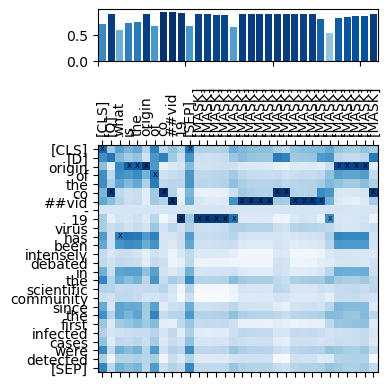

In [22]:
query = 'what is the origin of covid 19'
document = 'Origin of the COVID-19 virus has been intensely debated in the scientific community since the first infected cases were detected'
# in December 2019. The disease has caused a global pandemic, leading to deaths of thousands of people across the world and thus finding origin of this novel coronavirus is'

figure = factory.explain_text(query, document)

/data2/wangxiao/anaconda3/envs/v2/lib/python3.8/site-packages/colbert/utils/amp.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else NullContextManager()



#> QueryTokenizer.tensorize(batch_text[0], batch_background[0], bsize) ==
#> Input: what is the origin of covid 19, 		 True, 		 None
#> Output IDs: torch.Size([32]), tensor([  101,     1,  2054,  2003,  1996,  4761,  1997,  2522, 17258,  2539,
          102,   103,   103,   103,   103,   103,   103,   103,   103,   103,
          103,   103,   103,   103,   103,   103,   103,   103,   103,   103,
          103,   103], device='cuda:0')
#> Output Mask: torch.Size([32]), tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')



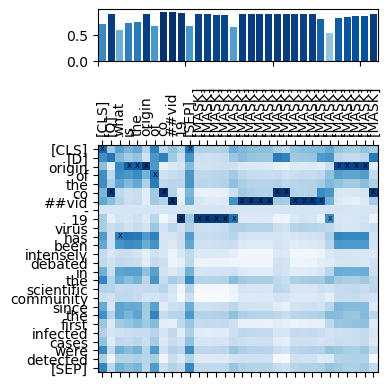

In [23]:
query = 'what is the origin of covid 19'
document = 'Origin of the COVID-19 virus has been intensely debated in the scientific community since the first infected cases were detected'
# in December 2019. The disease has caused a global pandemic, leading to deaths of thousands of people across the world and thus finding origin of this novel coronavirus is'

figure2 = factory_plaid.explain_text(query, document)